In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Data
train = pd.read_csv('../../Data/training_set.csv')

In [4]:
# Check if the value is Outlier
def check_outlier(value, q1, q3, IQR):
    return value > q3 + 1.5 * IQR or value < q1 - 1.5 * IQR

# Count the outlier of each column
def count_outlier(series: pd.Series):
    q3 = series.quantile(0.75)
    q1 = series.quantile(0.25)
    IQR = q3 - q1
    
    out_cnt = sum(series.apply(check_outlier, args = (q1, q3, IQR)))
    
    return out_cnt

# Assign the outlier count result except ID_code and class columns
train_out_cnt = train.drop(['ID_code', 'class'], axis = 1).apply(count_outlier)

Text(0.5, 1.0, 'Histogram: Outlier Ratio of Columns')

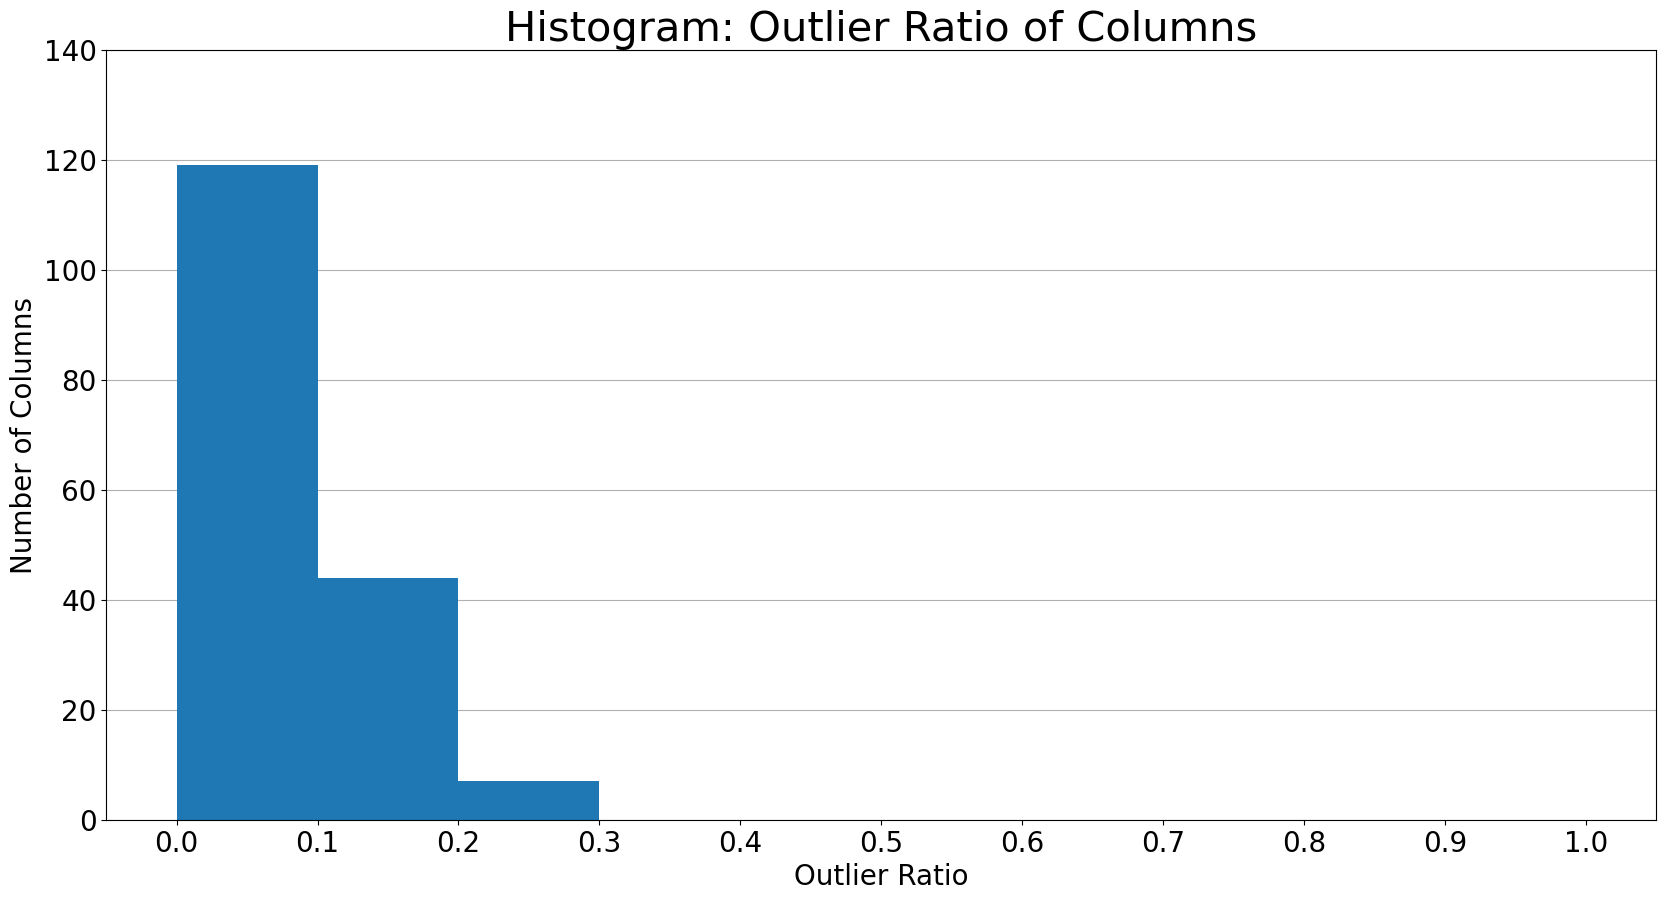

In [5]:
# Set histogram interval
bins = [round(0.1 * i, 1) for i in range(0, 11, 1)]

# Assign plot object
fig, ax = plt.subplots(figsize = (20, 10))

# plot histogram
ax.hist(train_out_cnt/train.shape[0], bins = bins)

# Set tick of axis
xticks = bins
yticks = ax.get_yticks()
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,
                   fontsize = 20)
ax.set_yticks(yticks)
ax.set_yticklabels([int(i) for i in yticks],
                   fontsize = 20)

# Set tick title
ax.set_xlabel('Outlier Ratio', fontsize = 20)
ax.set_ylabel('Number of Columns', fontsize = 20)

# Set grid
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Set Title
ax.set_title('Histogram: Outlier Ratio of Columns',
             fontsize = 30)

Text(0.5, 1.0, 'Outlier Count for each columns')

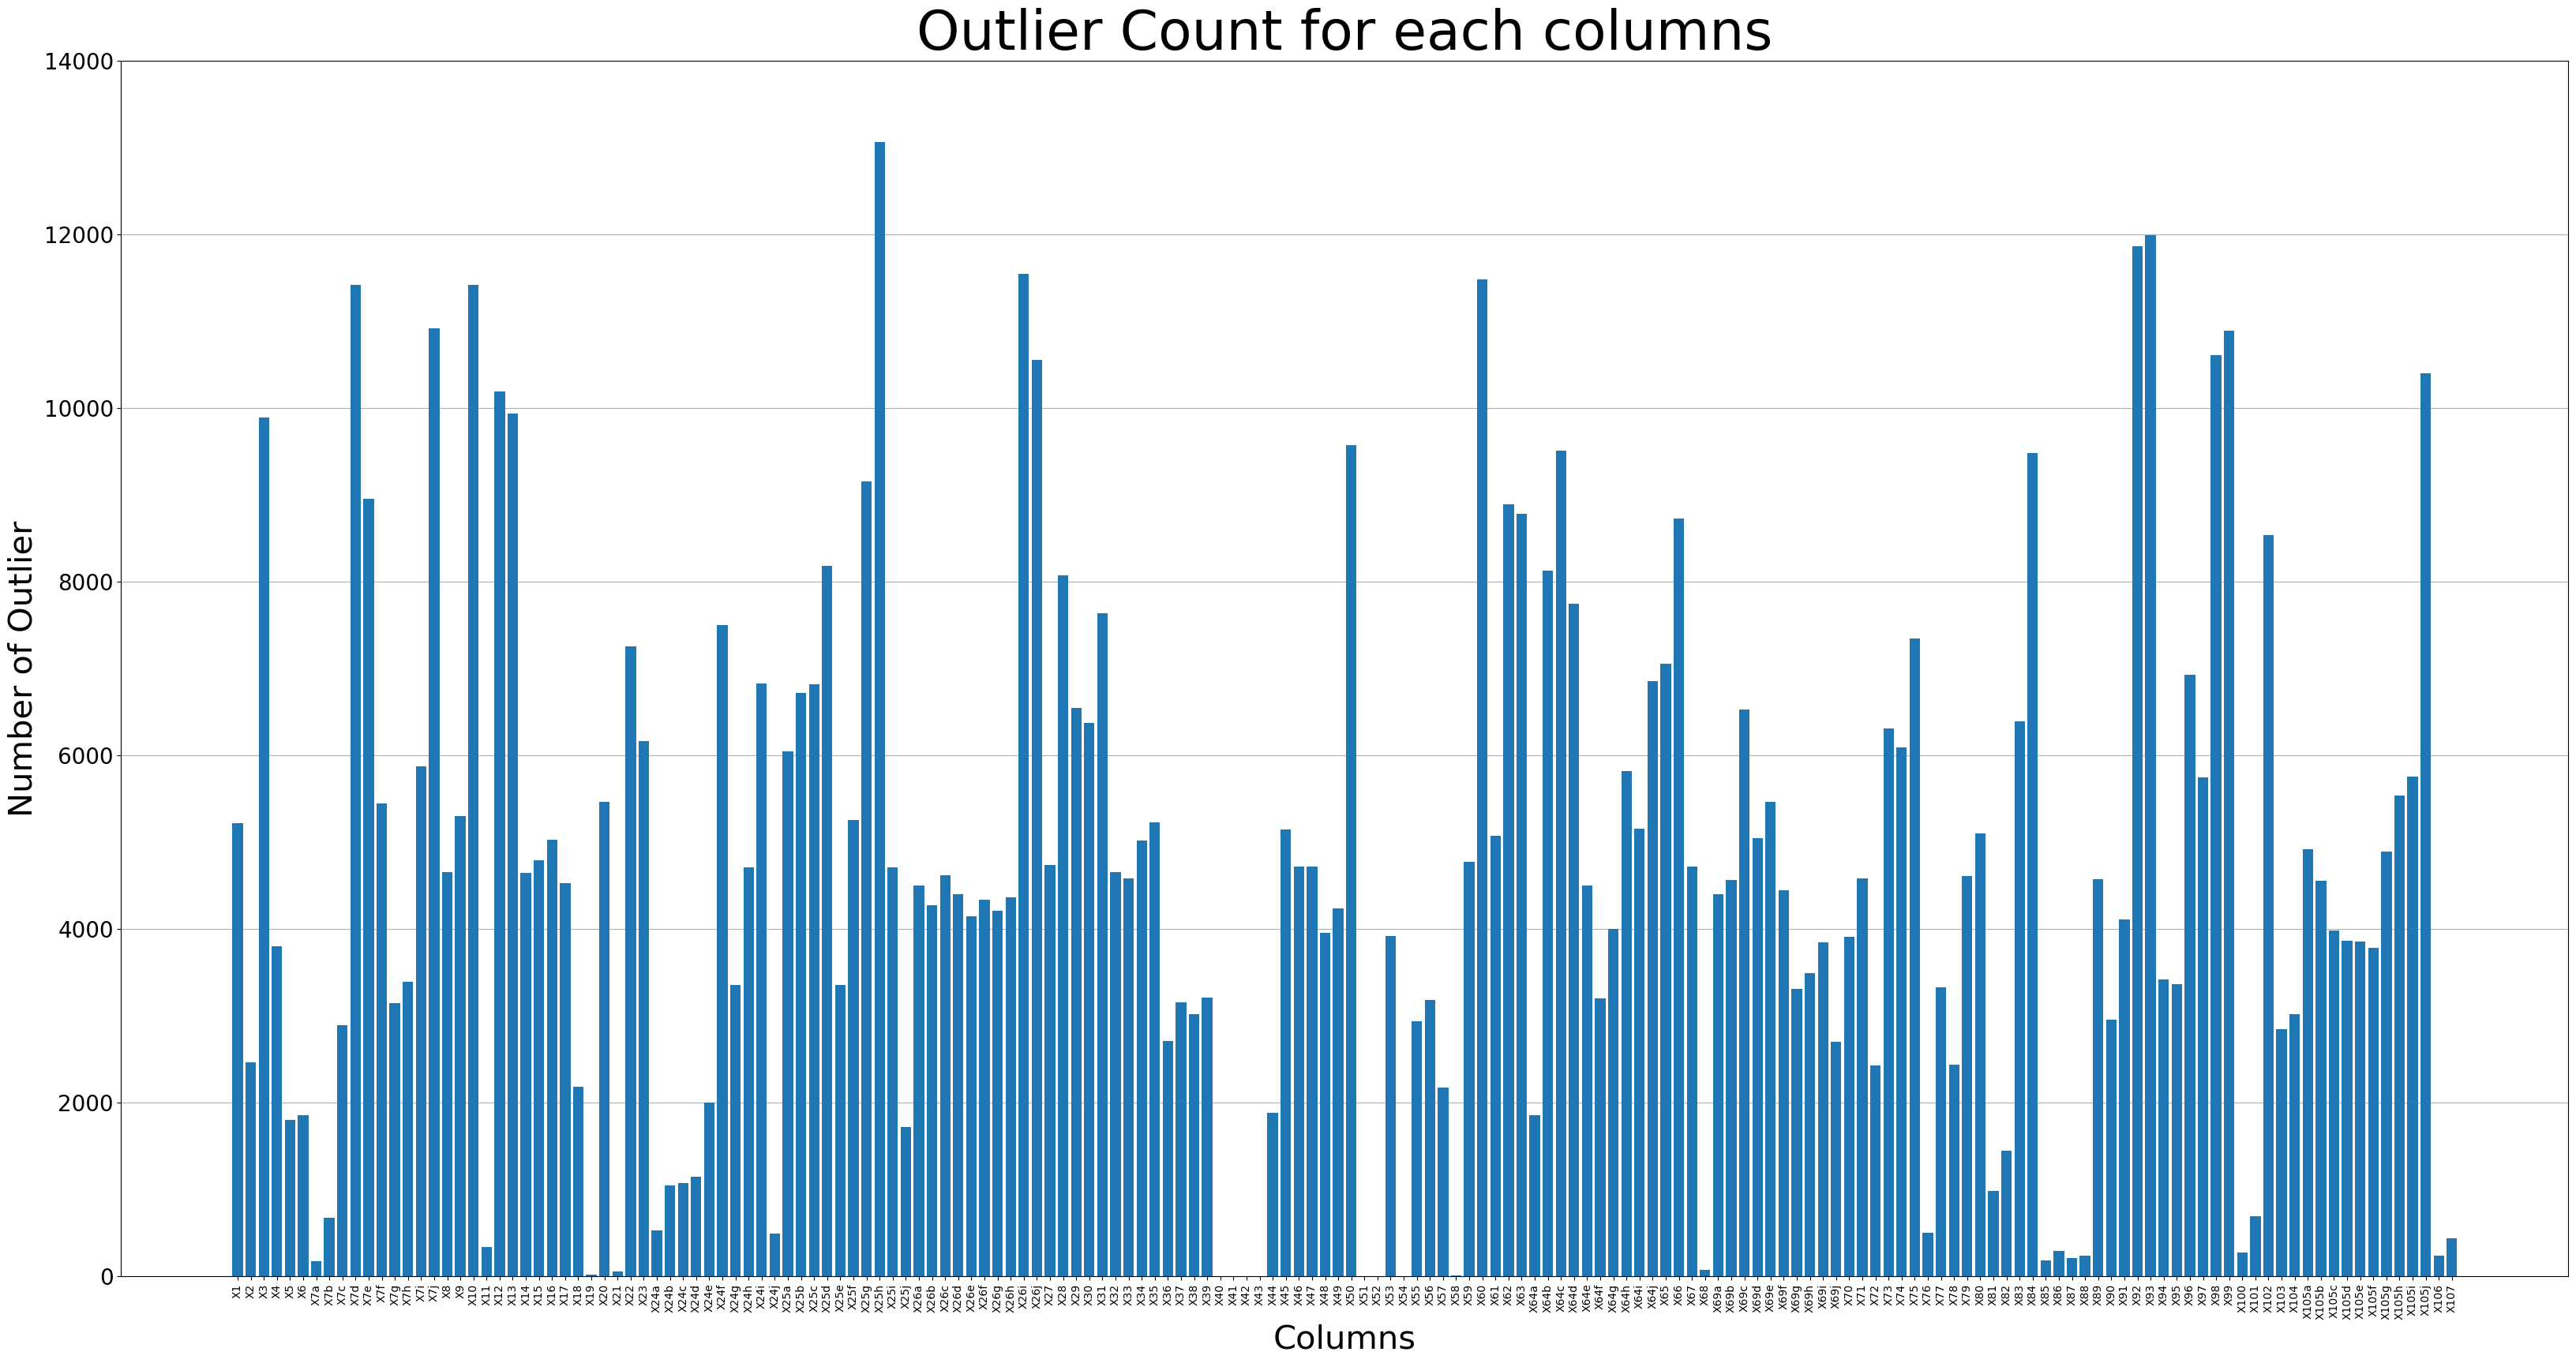

In [32]:
# Make list which indicate position of bar
x_idx = np.arange(train_out_cnt.shape[0])

# Assign plot object
fig, ax = plt.subplots(figsize = (40, 20))

# Plot bar
ax.bar(x_idx, train_out_cnt)

# Set tick of axis
ax.set_xticks(x_idx)
ax.set_xticklabels(train_out_cnt.index,
                   rotation = 90,
                   ha = 'center',
                   fontsize = 10)
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels([int(i) for i in yticks],
                   fontsize = 20)

# Set tick title
ax.set_xlabel('Columns', fontsize = 30)
ax.set_ylabel('Number of Outlier', fontsize = 30)

# Set Grid
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Set title
ax.set_title('Outlier Count for each columns',
             fontsize = 50)